# RSNA challange EDA

# -- 제공되는 파일:
- `[train/test]_images/[patient_id]/[image_id].dcm`: dicom 형식의 유방촬영 이미지입니다.
  - 숨겨진 테스트 세트에는 대략 8,000명의 환자가 있을 것입니다.
  - 환자당 이미지는 일반적으로 4개가 있지만 항상 그렇지는 않습니다.
  - 많은 이미지는 jpeg 2000 형식을 사용하므로 로드하기 위해 특수 라이브러리가 필요할 수 있습니다.
- `sample_submission.csv`: 유효한 샘플 제출 파일입니다. 다운로드할 수 있는 첫 몇 행만 제공됩니다.
- `[train/test].csv`: 각 환자와 이미지에 대한 메타데이터입니다. 테스트 세트의 첫 몇 행만 다운로드할 수 있습니다.

# -- 목록
- `site_id`: 데이터가 수집된 병원의 ID 코드입니다.
- `patient_id`: 환자의 ID 코드입니다.
- `image_id`: 이미지의 ID 코드입니다.
- `laterality`: 이미지가 왼쪽 유방인지 오른쪽 유방인지를 나타냅니다.
- `view`: 이미지의 방향을 나타냅니다. 스크리닝 검사의 기본값은 유방당 두 개의 이미지를 촬영하는 것입니다.
- `age`: 환자의 나이입니다.
- `implant`: 환자가 유방 임플란트를 가지고 있는지 여부입니다. 사이트 1은 유방 임플란트 정보를 유방 단위가 아닌 환자 단위로 제공합니다.
- `density`: 유방 조직의 밀도를 나타내는 등급으로, A가 가장 밀도가 낮고 D가 가장 밀도가 높습니다. 조직이 극도로 조밀하면 진단이 더 어려워질 수 있습니다. train에만 제공됩니다.
- `machine_id`: 이미징 장치의 ID 코드입니다.
- `cancer`: 유방이 악성 암에 양성이었는지 여부. 목표값. (train에만 제공)
- `biopsy`: 유방에 대한 추적 생검 수행 여부. (train에만 제공)
- `invasive`: 유방이 암에 양성인 경우 암이 침습적인 것으로 입증되었는지 여부. (train에만 제공)
- `BIRADS`: 유방이 추적 관찰을 필요로 하는 경우 0, 유방이 암에 대해 음성으로 평가된 경우 1, 유방이 정상으로 평가된 경우 2. (train에만 제공)
- `prediction_id`: 일치하는 제출 행의 ID입니다. 여러 이미지가 동일한 예측 ID를 공유합니다. Test Only.
- `difficult_negative_case`: 사례가 비정상적으로 어려웠다면 참입니다. (train에만 제공)

In [5]:
cd /workspace/sunggu/0.Challenge/RSNA2023/

/workspace/sunggu/0.Challenge/RSNA2023


In [ ]:
!pip install -U kaggle

In [ ]:
# 환경 변수 설정
import os

os.environ['KAGGLE_USERNAME'] = 'babbu3682'
os.environ['KAGGLE_KEY']      = 'fc972d48b4c65255ba4f2656ff4abecb'

# 데이터셋 다운로드
!kaggle competitions download -c rsna-breast-cancer-detection -p /workspace/sunggu/data/RSNA2023/a

# EDA from the given csv

In [1]:
import pandas as pd

# train CSV 파일 경로
train_csv_file_path = '/workspace/sunggu/0.Challenge/RSNA2023/dataset/rsna-breast-cancer-detection/train.csv'

# CSV 파일 불러오기
train_df = pd.read_csv(train_csv_file_path)

# 데이터 탐색
train_df.head()


,site_id,patient_id,image_id,laterality,view,age,cancer,biopsy,invasive,BIRADS,implant,density,machine_id,difficult_negative_case
0,2,10006,462822612,L,CC,61.0,0,0,0,NaN,0,NaN,29,False
1,2,10006,1459541791,L,MLO,61.0,0,0,0,NaN,0,NaN,29,False
2,2,10006,1864590858,R,MLO,61.0,0,0,0,NaN,0,NaN,29,False
3,2,10006,1874946579,R,CC,61.0,0,0,0,NaN,0,NaN,29,False
4,2,10011,220375232,L,CC,55.0,0,0,0,0.0,0,NaN,21,True


In [2]:
# test CSV 파일 경로
test_csv_file_path = '/workspace/sunggu/0.Challenge/RSNA2023/dataset/rsna-breast-cancer-detection/test.csv'

# CSV 파일 불러오기
test_df = pd.read_csv(test_csv_file_path)

# 데이터 탐색
test_df.head()

,site_id,patient_id,image_id,laterality,view,age,implant,machine_id,prediction_id
0,2,10008,736471439,L,MLO,81,0,21,10008_L
1,2,10008,1591370361,L,CC,81,0,21,10008_L
2,2,10008,68070693,R,MLO,81,0,21,10008_R
3,2,10008,361203119,R,CC,81,0,21,10008_R


Number of TOTAL images: 54710
Total unique patients: 11914
Total unique images: 54710
--------------------------------------------------
Statistics: Images per Patient
count    11914.000000
mean         4.592077
std          1.133182
min          4.000000
25%          4.000000
50%          4.000000
75%          5.000000
max         14.000000
Name: image_id, dtype: float64
--------------------------------------------------
Image records count per laterality (R): 27441
Image records count per laterality (L): 27269
--------------------------------------------------
Image records count per View:
view
MLO    27905
CC     26767
AT        19
LM        10
ML         8
LMO        1
Name: count, dtype: int64
--------------------------------------------------
Class imbalance ['cancer']
Positive: 1158.0
Negative: 53552.0


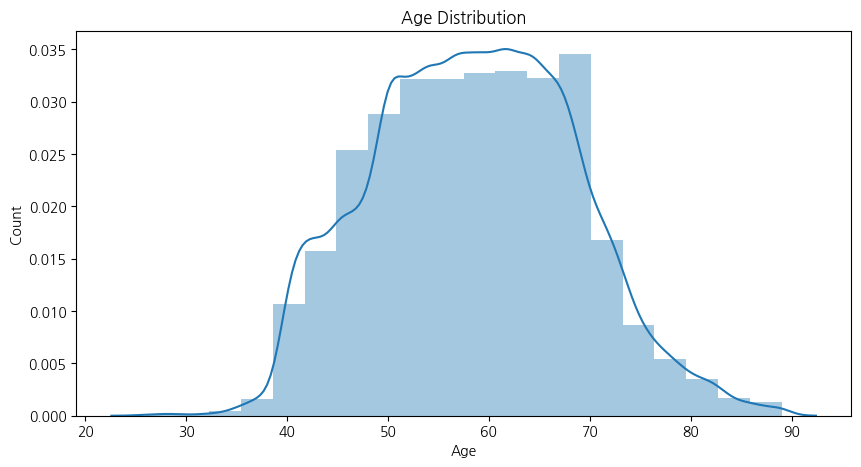

In [104]:
# read csv head
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


'''
We want to perform EDA with python code using the given csv file.

data_dir = '/workspace/sunggu/0.Challenge/RSNA2023/dataset/rsna-breast-cancer-detection'
train_image = 'train_images'
train_label = 'train.csv'
test_image = 'test_images'
test_label = 'test.csv'

Here's the distribution of what we want to know: 
1. Number of TOTAL images, 
2. Total unique patients, 
3. Total unique images, 
4. Statistics: Images per Patient, 
5. Image records count per laterality, 
6. Image records count per View, 
7. Class imbalance ['cancer']
'''

# Get list of all unique image filenames
unique_train_image_files = train_df['image_id'].unique()
unique_test_image_files  = test_df['image_id'].unique()
unique_image_files = set(list(unique_train_image_files) + list(unique_test_image_files))

# Print total number of images
num_images = len(unique_image_files)
print(f"Number of TOTAL images: {num_images}")

# Calculate number of unique patients and images
all_labels = pd.concat([train_df, test_df])
num_patients = all_labels['patient_id'].nunique()
num_images = all_labels['image_id'].nunique()

# Print number of unique patients and images
print(f"Total unique patients: {num_patients}")
print(f"Total unique images: {num_images}")
print("-" * 50)

# Calculate statistics for number of images per patient
images_per_patient = all_labels.groupby('patient_id')['image_id'].count()
image_stats = images_per_patient.describe()

# Print statistics for number of images per patient
print("Statistics: Images per Patient")
print(image_stats)
print("-" * 50)

# Calculate number of image records for each laterality (R and L)
right_count = all_labels[all_labels['laterality'] == 'R']['image_id'].count()
left_count = all_labels[all_labels['laterality'] == 'L']['image_id'].count()

# Print number of image records for each laterality (R and L)
print(f"Image records count per laterality (R): {right_count}")
print(f"Image records count per laterality (L): {left_count}")
print("-" * 50)

# Calculate number of image records for each view
view_counts = all_labels['view'].value_counts()

# Print number of image records for each view
print("Image records count per View:")
print(view_counts)
print("-" * 50)

# Calculate class imbalance for cancer
cancer_count = all_labels['cancer'].sum()
non_cancer_count = all_labels.shape[0] - cancer_count

# Print class imbalance for cancer
print("Class imbalance ['cancer']")
print(f"Positive: {cancer_count}")
print(f"Negative: {non_cancer_count}")

# plot Age histogram
plt.figure(figsize=(10, 5))
sns.distplot(all_labels['age'], bins=20)
# sns.distplot(all_labels['age'], bins=20, kde=False)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


- test에 집중.
- [laterality / view / age / implant]에 따른 cancer 비율

In [3]:
# target label 'cancer'의 비율
train_df['cancer'].value_counts()

cancer
0    53548
1     1158
Name: count, dtype: int64

- laterality / view / age / implant]에 따른 cancer 비율 측정

In [77]:
# 1. implant
implant_cancer_ratio = train_df.groupby(['implant'])['cancer'].sum()

# 결과 출력
print(implant_cancer_ratio) 

# --> implant와 상관관계 X

implant
0    1145
1      13
Name: cancer, dtype: int64


age
(0, 10]       0
(10, 20]      0
(20, 30]      0
(30, 40]     13
(40, 50]    116
(50, 60]    284
(60, 70]    422
(70, 80]    279
(80, 90]     44
Name: cancer, dtype: int64


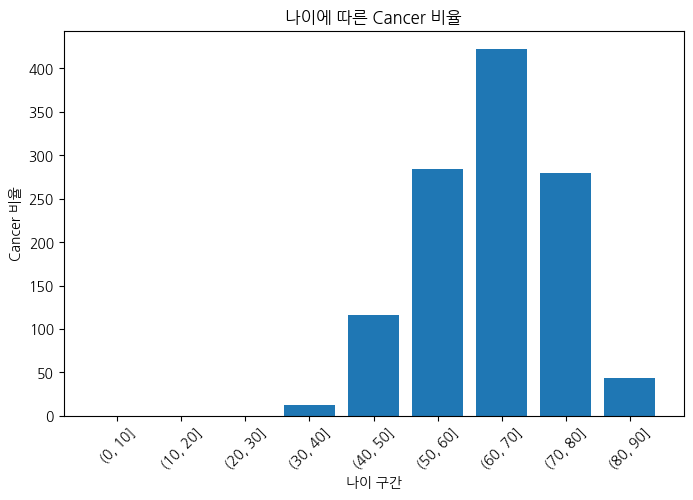

In [78]:
# 2. Age에 따른 cancer 비율 계산
age_intervals = range(0, 100, 10)  # 10살씩 구간을 나눔
age_cancer_ratio = train_df.groupby(pd.cut(train_df['age'], bins=age_intervals))['cancer'].sum()

# 결과 출력
print(age_cancer_ratio)

# 그래프로도 표현해주세요.
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
plt.bar(age_cancer_ratio.index.astype(str), age_cancer_ratio)
plt.xlabel('나이 구간')
plt.ylabel('Cancer 비율')
plt.title('나이에 따른 Cancer 비율')
plt.xticks(rotation=45)
plt.show()

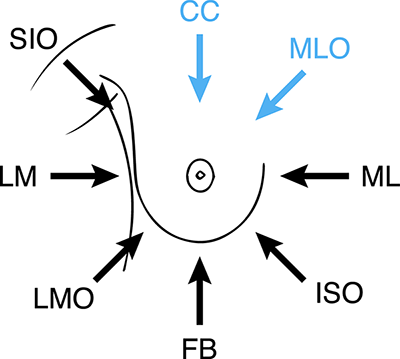

### http://med_physics.i-do.science/topics/diagnose_breast/

In [79]:
# 3. View에 따른 cancer 비율 계산

view_cancer_ratio = train_df.groupby(train_df['view'])['cancer'].sum() 
view_cancer_ratio

# axillary tail (AT)
# craniocaudal  (CC) 
# lateromedial  (LM)
# lateromedial oblique (LMO)
# mediolateral  (ML)
# mediolateral oblique (MLO)


view
AT       2
CC     566
LM       0
LMO      0
ML       0
MLO    590
Name: cancer, dtype: int64

In [80]:
# 4. laterality에 따른 cancer 비율 계산

laterality_cancer_ratio = train_df.groupby(train_df['laterality'])['cancer'].sum() 
laterality_cancer_ratio

# --> laterality와 상관관계 X

laterality
L    588
R    570
Name: cancer, dtype: int64

In [82]:
train_df.head()

,site_id,patient_id,image_id,laterality,view,age,cancer,biopsy,invasive,BIRADS,implant,density,machine_id,difficult_negative_case
0,2,10006,462822612,L,CC,61.0,0,0,0,NaN,0,NaN,29,False
1,2,10006,1459541791,L,MLO,61.0,0,0,0,NaN,0,NaN,29,False
2,2,10006,1864590858,R,MLO,61.0,0,0,0,NaN,0,NaN,29,False
3,2,10006,1874946579,R,CC,61.0,0,0,0,NaN,0,NaN,29,False
4,2,10011,220375232,L,CC,55.0,0,0,0,0.0,0,NaN,21,True


# csv에 path 삽입

In [17]:
from functools import partial
def make_path(x, target_path):
    return target_path + str(x['patient_id']) + '/' + str(x['image_id']) + '.dcm'

In [18]:
# 'path' add
train_df['path'] = train_df.apply(partial(make_path, target_path='/workspace/sunggu/0.Challenge/RSNA2023/dataset/rsna-breast-cancer-detection/train_images/'), axis=1)
test_df['path']  = test_df.apply(partial(make_path, target_path='/workspace/sunggu/0.Challenge/RSNA2023/dataset/rsna-breast-cancer-detection/test_images/'), axis=1)

# train -> train / valid split 
from sklearn.model_selection import train_test_split

train_df, valid_df = train_test_split(train_df, test_size=0.2, random_state=42)

In [21]:
# csv 저장
# train_df.to_csv('/workspace/sunggu/0.Challenge/RSNA2023/dataset/rsna-breast-cancer-detection/split_train_path.csv', index=False)
# valid_df.to_csv('/workspace/sunggu/0.Challenge/RSNA2023/dataset/rsna-breast-cancer-detection/split_valid_path.csv', index=False)
# test_df.to_csv('/workspace/sunggu/0.Challenge/RSNA2023/dataset/rsna-breast-cancer-detection/test_path.csv', index=False)

In [ ]:
# csv 불러오기
# train_df = pd.read_csv('/workspace/sunggu/0.Challenge/RSNA2023/dataset/rsna-breast-cancer-detection/split_train_path.csv')
# valid_df = pd.read_csv('/workspace/sunggu/0.Challenge/RSNA2023/dataset/rsna-breast-cancer-detection/split_valid_path.csv')
# test_df  = pd.read_csv('/workspace/sunggu/0.Challenge/RSNA2023/dataset/rsna-breast-cancer-detection/test_path.csv')


# EDA from the dicom

In [ ]:
# read the dicom sample file
import pydicom
import glob

# parsing all the train dicom images
train_dicoms = glob.glob('/workspace/sunggu/0.Challenge/RSNA2023/dataset/rsna-breast-cancer-detection/train_images/*/*.dcm')

# read the dicom file
dicom_data = pydicom.dcmread(train_dicoms[0])


In [ ]:
dicom_data

In [ ]:
import numpy as np
# load the saved npy file
data_dir = '/workspace/sunggu/0.Challenge/RSNA2023/dataset/rsna-breast-cancer-detection'

image_shapes      = np.load(os.path.join(data_dir, 'image_shapes.npy'))
image_intensities = np.load(os.path.join(data_dir, 'image_intensities.npy'))
rescale_types     = np.load(os.path.join(data_dir, 'rescale_types.npy'))
voi_lut_functions = np.load(os.path.join(data_dir, 'voi_lut_functions.npy'))

In [ ]:
'''
We want to perform EDA with python code parsing the the dicom file.

data_dir = '/workspace/sunggu/0.Challenge/RSNA2023/dataset/rsna-breast-cancer-detection'

Please save all the information parsed from the code above to the list and analyze the distribution.

Please use the above code to perform for loop quickly using multiprocessing.

Here's the distribution of what we want to know: 
1. image shape, 
2. intensity of image, 
3. Rescale Type, 
4. VOI LUT Function
'''

import os
import pydicom
import numpy as np
from multiprocessing import Pool, cpu_count

# Set path to data directory
data_dir = '/workspace/sunggu/0.Challenge/RSNA2023/dataset/rsna-breast-cancer-detection'

# Initialize empty lists to store EDA information
image_shapes = []
image_intensities = []
rescale_types = []
voi_lut_functions = []

# Get list of all DICOM files in data directory
dicom_files = glob.glob('/workspace/sunggu/0.Challenge/RSNA2023/dataset/rsna-breast-cancer-detection/train_images/*/*.dcm')

# Define a function to extract EDA information from a single DICOM file
def process_dicom_file(dicom_file):
    # Load DICOM file
    ds = pydicom.dcmread(dicom_file)
    
    # Extract image shape
    image_shape = ds.pixel_array.shape
    
    # Extract image intensity range
    image_intensity = (ds.pixel_array.min(), ds.pixel_array.max())
    
    # Extract Rescale Type
    if 'RescaleType' in ds:
        rescale_type = ds.RescaleType
    else:
        rescale_type = 'Not specified'
    
    # Extract VOI LUT Function
    if 'VOILUTFunction' in ds:
        voi_lut_function = ds.VOILUTFunction
    else:
        voi_lut_function = 'Not specified'
    
    return image_shape, image_intensity, rescale_type, voi_lut_function

# Define a function to process DICOM files in parallel using multiprocessing
def process_dicom_files_parallel(dicom_files):
    # Create a multiprocessing pool with the maximum number of available CPU cores
    with Pool(processes=cpu_count()) as pool:
        # Process all DICOM files in parallel and collect results
        results = pool.map(process_dicom_file, dicom_files)
    
    # Unpack results into separate lists
    for image_shape, image_intensity, rescale_type, voi_lut_function in results:
        image_shapes.append(image_shape)
        image_intensities.append(image_intensity)
        rescale_types.append(rescale_type)
        voi_lut_functions.append(voi_lut_function)

# Process DICOM files in parallel
process_dicom_files_parallel(dicom_files)


In [ ]:
# Convert lists to numpy arrays for easier analysis
image_shapes      = np.array(image_shapes)
image_intensities = np.array(image_intensities)
rescale_types     = np.array(rescale_types)
voi_lut_functions = np.array(voi_lut_functions)

# Analyze distributions of EDA information
print("Distribution of Image Shapes:")
print(np.unique(image_shapes, return_counts=True))
print("-" * 50)

print("Distribution of Image Intensities:")
print(f"Minimum intensity: {image_intensities[:, 0].min()}")
print(f"Maximum intensity: {image_intensities[:, 1].max()}")
print("-" * 50)

print("Distribution of Rescale Types:")
print(np.unique(rescale_types, return_counts=True))
print("-" * 50)

print("Distribution of VOI(Values Of Interest) LUT Functions:")
print(np.unique(voi_lut_functions, return_counts=True))
print("-" * 50)

# 참고: https://dicom.nema.org/dicom/2013/output/chtml/part17/chapter_Y.html

In [ ]:
# # save the list to npy file
# np.save(os.path.join(data_dir, 'image_shapes.npy'), image_shapes)
# np.save(os.path.join(data_dir, 'image_intensities.npy'), image_intensities)
# np.save(os.path.join(data_dir, 'rescale_types.npy'), rescale_types)
# np.save(os.path.join(data_dir, 'voi_lut_functions.npy'), voi_lut_functions)


In [ ]:
image_shapes

In [ ]:
image_intensities

In [ ]:
min_list = [i[0] for i in image_intensities]
max_list = [i[1] for i in image_intensities]

k = pd.DataFrame()
k['min'] = min_list
k['max'] = max_list

k.describe()

### 참고: https://www.kaggle.com/gzuidhof/full-preprocessing-tutorial

In [ ]:
dicom_data = pydicom.dcmread('/workspace/sunggu/0.Challenge/RSNA2023/dataset/rsna-breast-cancer-detection/train_images/10006/1459541791.dcm')

dicom_data

In [ ]:
from pydicom.pixel_data_handlers.util import apply_modality_lut, apply_voi_lut

a = apply_modality_lut(dicom_data.pixel_array, dicom_data)    # RescaleSlope * pixel_array + RescaleIntercept, But 보통 slope = 1, intercept = 0 이 default가 많음.
                                                              # a = int(dicom_data.RescaleSlope) * dicom_data.pixel_array + int(dicom_data.RescaleIntercept)

b = apply_voi_lut(a, dicom_data)                              # Pixel Representation, Bits Stored 조정

In [ ]:
train_df[train_df['image_id'] == 1459541791]

In [ ]:
plt.imshow(a, 'gray')
print("Just pixel_array         = ", dicom_data.pixel_array.max(), dicom_data.pixel_array.min())
print("After apply_modality_lut = ", a.max(), a.min())
plt.title('pixel array image')

In [ ]:
plt.imshow(b, 'gray')
print("After apply_modality_lut = ", a.max(), a.min())
print("After apply_voi_lut      = ", b.max(), b.min())
plt.title('voi image')

In [ ]:
# dicom_data = pydicom.dcmread('/workspace/sunggu/0.Challenge/RSNA2023/dataset/rsna-breast-cancer-detection/train_images/10130/388811999.dcm')
dicom_data = pydicom.dcmread('/workspace/sunggu/0.Challenge/RSNA2023/dataset/rsna-breast-cancer-detection/train_images/9851/1409270544.dcm')

dicom_data

In [ ]:
a = apply_modality_lut(dicom_data.pixel_array, dicom_data)    
b = apply_voi_lut(a, dicom_data)               

In [ ]:
plt.imshow(a, 'gray')
print("Just pixel_array         = ", dicom_data.pixel_array.max(), dicom_data.pixel_array.min())
print("After apply_modality_lut = ", a.max(), a.min())
plt.title('pixel array image')

In [ ]:
plt.imshow(b, 'gray')
print("After apply_modality_lut = ", a.max(), a.min())
print("After apply_voi_lut      = ", b.max(), b.min())
plt.title('voi image')

In [ ]:
# train_df[train_df['image_id'] == 388811999]
train_df[train_df['image_id'] == 1409270544]

- 정리

- 나이에 따라서 영향을 미칠수있다.                -> 추후 Multi-modal 개발
- L, R에 강건해야 한다.                          -> Augmentation
- 배경과 전경에 intensity 반전에 강건해야 한다.   -> Augmentation
- MLO, CC에 cancer가 편향됨 일부 AT에도 발견.    -> 추후 따로 개발 및 Augmentation 가능?
- intensity outlier 제외                       -> percentile로 쳐내기


# CSV 파일에 path 경로 넣기

In [4]:
import os
import pandas as pd

# read csv
data_dir = '/workspace/sunggu/0.Challenge/Med_tutorial_ChatGPT/dataset'
train_df = pd.read_csv(os.path.join(data_dir, 'train.csv'))

In [5]:
train_df.head()

,site_id,patient_id,image_id,laterality,view,age,cancer,biopsy,invasive,BIRADS,implant,density,machine_id,difficult_negative_case
0,1,10130,388811999,L,MLO,71.0,1,1,1,0.0,0,B,49,False
1,1,10130,613462606,L,CC,71.0,1,1,1,0.0,0,B,49,False
2,1,10130,1360338805,L,CC,71.0,1,1,1,0.0,0,B,49,False
3,1,10130,1672636630,L,MLO,71.0,1,1,1,0.0,0,B,49,False
4,1,10226,461614796,L,MLO,71.0,1,1,1,0.0,0,C,49,False


In [ ]:
train_df['path'] = train_df['image_id'].apply(lambda x: os.path.join(data_dir, 'train_images', x))

In [7]:
# train_df['path']에 경로 넣기 양식: data_dir + train_df['patient_id']/train_df['image_id'].dcm

train_df['path'] = train_df.apply(lambda row: os.path.join(data_dir + '/train_images', str(row['patient_id']), str(row['image_id']) + '.dcm'), axis=1)

In [14]:
train_df['path'].values[0]

'/workspace/sunggu/0.Challenge/Med_tutorial_ChatGPT/dataset/train_images/10130/388811999.dcm'

In [20]:
from sklearn.model_selection import train_test_split

# 학습용 데이터와 검증용 데이터를 8:2 비율로 분할
train_data, valid_data = train_test_split(train_df, test_size=0.2, random_state=42)
valid_data, test_data  = train_test_split(valid_data, test_size=0.5, random_state=42)

# 분할 결과 확인
print("학습용 데이터 개수: ",   len(train_data))
print("최적화용 데이터 개수: ", len(valid_data))
print("검증용 데이터 개수: ",   len(test_data))

학습용 데이터 개수:  1852
최적화용 데이터 개수:  232
검증용 데이터 개수:  232


In [21]:
train_data['mode'] = 'train'
valid_data['mode'] = 'valid'
test_data['mode']  = 'test'

In [22]:
# train_data valid_data 합치기
total_data = pd.concat([train_data, valid_data, test_data], axis=0)

In [23]:
total_data.head()

,site_id,patient_id,image_id,laterality,view,age,cancer,biopsy,invasive,BIRADS,implant,density,machine_id,difficult_negative_case,path,mode
1789,2,55148,926538150,R,MLO,56.0,1,1,0,NaN,0,NaN,21,False,/workspace/sunggu/0.Challenge/Med_tutorial_Cha...,train
1826,1,26380,358181377,R,CC,64.0,0,1,0,0.0,0,B,49,True,/workspace/sunggu/0.Challenge/Med_tutorial_Cha...,train
2106,1,36387,26934018,L,MLO,57.0,0,0,0,0.0,0,B,210,True,/workspace/sunggu/0.Challenge/Med_tutorial_Cha...,train
1646,2,30842,1408047595,L,CC,51.0,1,1,1,NaN,0,NaN,29,False,/workspace/sunggu/0.Challenge/Med_tutorial_Cha...,train
2067,1,28989,1880776532,R,MLO,52.0,1,1,1,0.0,0,C,49,False,/workspace/sunggu/0.Challenge/Med_tutorial_Cha...,train


In [24]:
# train_df csv 저장

total_data.to_csv(os.path.join(data_dir, 'rsna_data.csv'), index=False)

In [3]:
import pandas as pd


root       = '/workspace/sunggu/0.Challenge/Med_tutorial_ChatGPT/dataset/rsna_data.csv'
temp_df    = pd.read_csv(root)

In [5]:
temp_df[temp_df['mode']=='train']['cancer'].value_counts()

cancer
0    930
1    922
Name: count, dtype: int64

In [6]:
temp_df[temp_df['mode']=='valid']['cancer'].value_counts()

cancer
1    118
0    114
Name: count, dtype: int64

In [7]:
temp_df[temp_df['mode']=='test']['cancer'].value_counts()

cancer
1    118
0    114
Name: count, dtype: int64

# Set Dataset

In [1]:
cd /workspace/sunggu/0.Challenge/RSNA2023/

/workspace/sunggu/0.Challenge/RSNA2023


In [2]:
import os
import skimage
import torch
import pydicom
from torch.utils.data import Dataset as BaseDataset
import cv2
import numpy as np
import pandas as pd
import random
import albumentations as A
from albumentations.pytorch import ToTensorV2

In [69]:
def fixed_clahe(image, **kwargs):
    clahe_mat = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    return clahe_mat.apply(image)

# albumentation min max normalization
def min_max_normalization(image, **kwargs):
    image = image.astype('float32')
    image -= image.min()
    image /= image.max() 
    return image
    
def change_to_uint8(image, **kwargs):
    return skimage.util.img_as_ubyte(image)

def change_to_float32(image, **kwargs):
    return skimage.util.img_as_float32(image)

def get_transforms(mode="train"):
    # medical augmentation
    if mode == "train":
        return A.Compose([
            # Preprocessing
            A.Resize(224, 224), # 7*2**5 = 224
            A.Lambda(image=min_max_normalization, always_apply=True),
            A.Lambda(image=change_to_uint8, always_apply=True),
            A.CLAHE(clip_limit=2.0, tile_grid_size=(8, 8), always_apply=True),
            A.Lambda(image=change_to_float32, always_apply=True),

            # Augmentation
            A.HorizontalFlip(p=0.5),
            A.RandomBrightnessContrast(p=0.5),
            A.ShiftScaleRotate(shift_limit=0.1, scale_limit=0.2, rotate_limit=30, p=0.5),
            A.InvertImg(p=0.5),

            # Normalize
            A.Lambda(image=min_max_normalization, always_apply=True),
            A.Normalize(max_pixel_value=1.0, mean=0.5, std=0.5),
            ToTensorV2()
        ])

    else:
        return A.Compose([
            # Preprocessing
            A.Resize(224, 224),
            A.Lambda(image=min_max_normalization, always_apply=True),
            A.Lambda(image=change_to_uint8, always_apply=True),
            A.Lambda(image=fixed_clahe, always_apply=True),
            A.Lambda(image=change_to_float32, always_apply=True),
            
            # Normalize
            A.Lambda(image=min_max_normalization, always_apply=True),
            A.Normalize(max_pixel_value=1.0, mean=0.5, std=0.5),
            ToTensorV2()
        ])

from pydicom.pixel_data_handlers.util import apply_modality_lut, apply_voi_lut

class RSNA_Dataset(BaseDataset):
    def __init__(self, mode="train"):
        self.root = '/workspace/sunggu/0.Challenge/RSNA2023/dataset/rsna-breast-cancer-detection/'
        self.mode = mode

        self.data_csv   = os.path.join(self.root, "split_" + mode + "_path.csv")
        self.transforms = get_transforms(mode=mode)
        self.df         = pd.read_csv(self.data_csv)

        print(f"len of data: {len(self.df)}")

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        img_path = self.df['path'].iloc[idx]
        dcm_data = pydicom.dcmread(img_path)
        temp_img = apply_modality_lut(dcm_data.pixel_array, dcm_data)   
        image    = apply_voi_lut(temp_img, dcm_data)                             

        label    = self.df['cancer'].iloc[idx]
        label    = torch.tensor(label).float().unsqueeze(0)

        # add channel axis
        image    = np.expand_dims(image, axis=-1)
        image    = self.transforms(image=image)['image']
        
        return image, label
    

In [70]:
from torch.utils.data import DataLoader

# 1. Create Dataset
train_dataset  = RSNA_Dataset(mode='train')
valid_dataset  = RSNA_Dataset(mode='valid')
# 2. Create DataLoader
train_loader  = DataLoader(train_dataset, batch_size=10, shuffle=True, num_workers=0)
valid_loader  = DataLoader(valid_dataset, batch_size=10, shuffle=False, num_workers=0)


len of data: 43764
len of data: 10942


In [71]:
t_image, t_label = next(iter(train_loader))
v_image, v_label = next(iter(valid_loader))


In [72]:
print(v_label.shape)
print(t_label.shape)

torch.Size([10, 1])
torch.Size([10, 1])


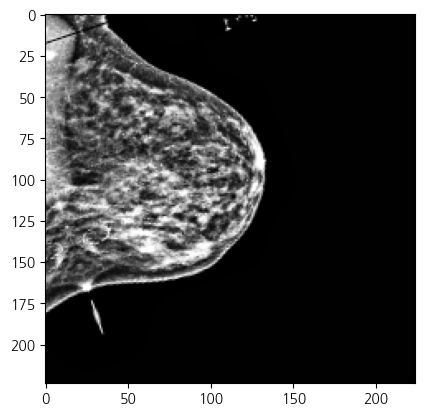

tensor(1.) tensor(-1.)


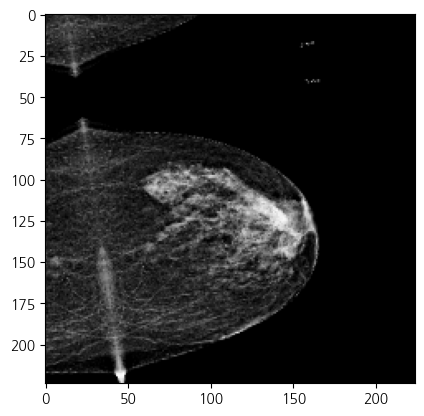

tensor(1.) tensor(-1.)


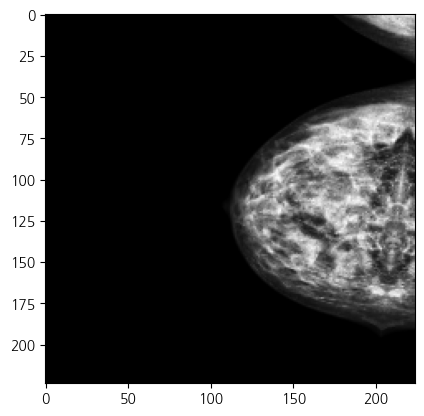

tensor(1.) tensor(-1.)


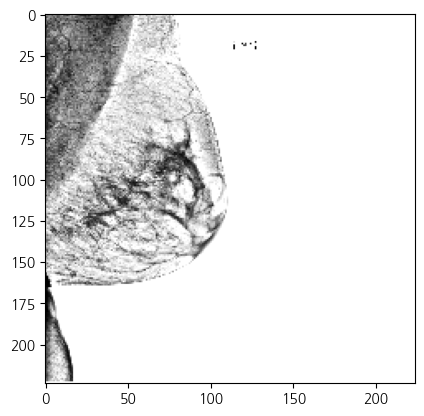

tensor(1.) tensor(-1.)


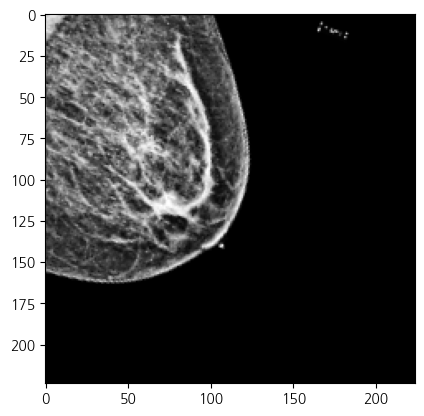

tensor(1.) tensor(-1.)


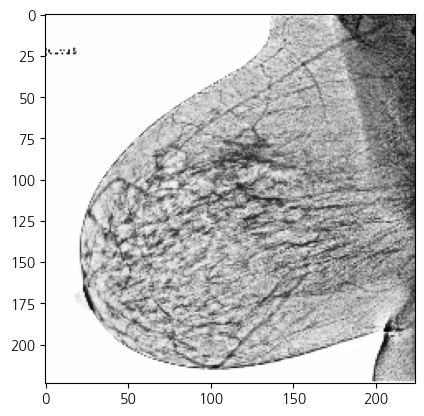

tensor(1.) tensor(-1.)


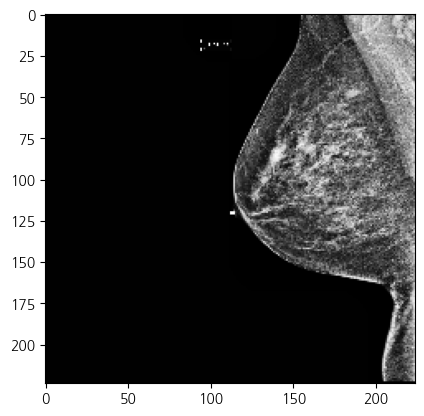

tensor(1.) tensor(-1.)


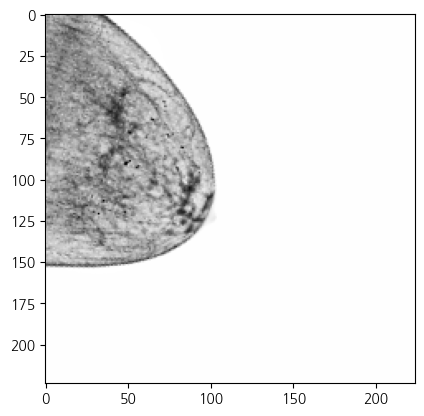

tensor(1.) tensor(-1.)


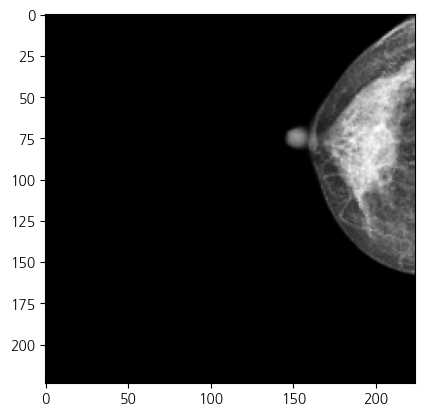

tensor(1.) tensor(-1.)


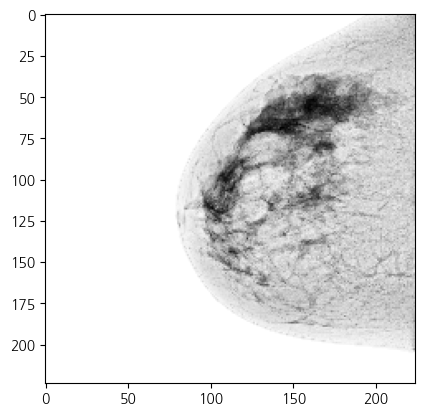

tensor(1.) tensor(-1.)


In [65]:
import matplotlib.pyplot as plt

for i in range(10):
    plt.imshow(t_image[i][0], 'gray')
    plt.show()

    print(t_image[i][0].max(), t_image[i][0].min())

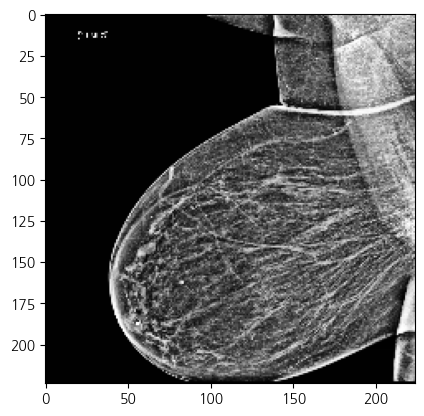

tensor(1.) tensor(-1.)


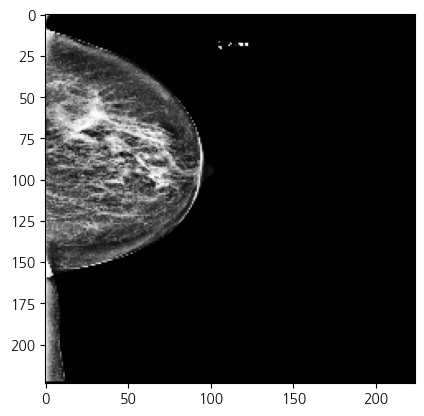

tensor(1.) tensor(-1.)


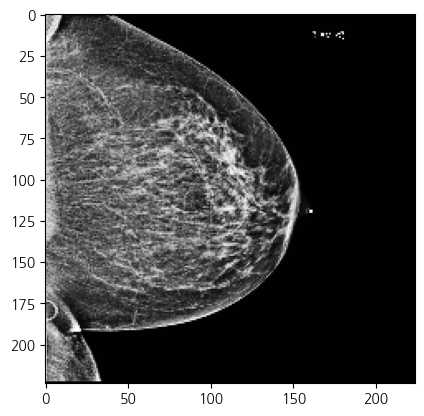

tensor(1.) tensor(-1.)


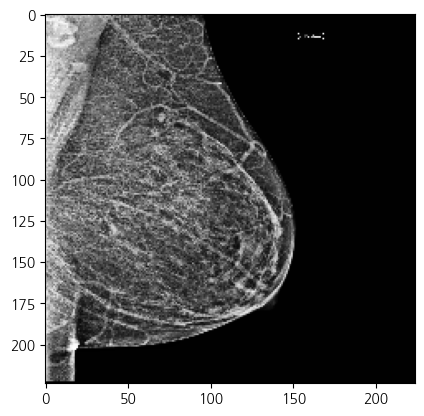

tensor(1.) tensor(-1.)


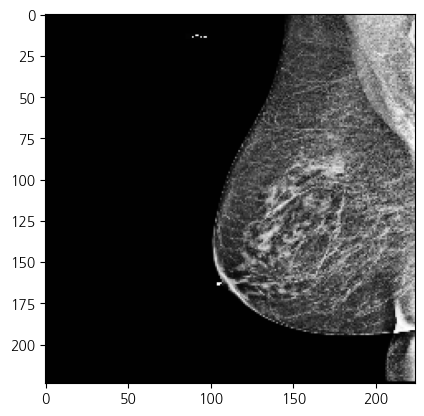

tensor(1.) tensor(-1.)


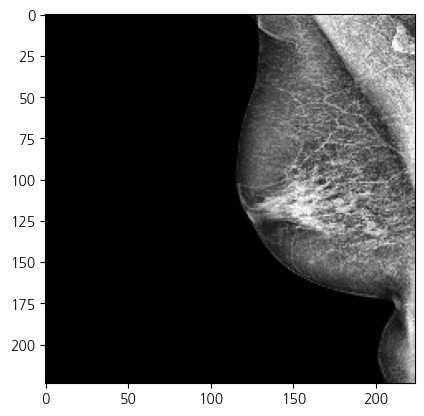

tensor(1.) tensor(-1.)


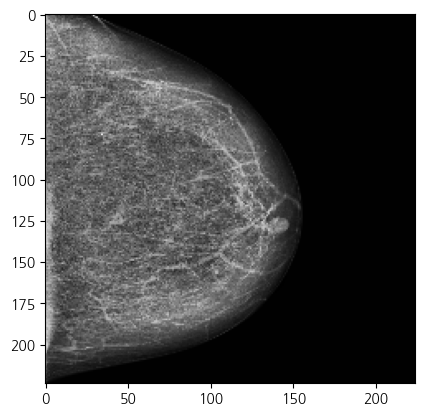

tensor(1.) tensor(-1.)


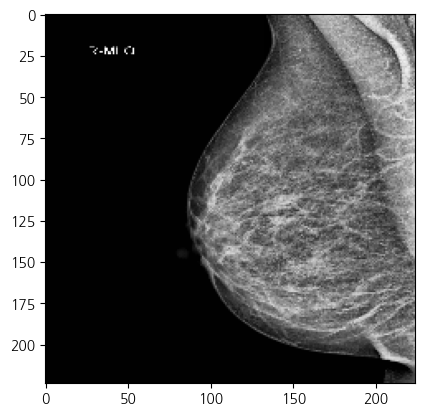

tensor(1.) tensor(-1.)


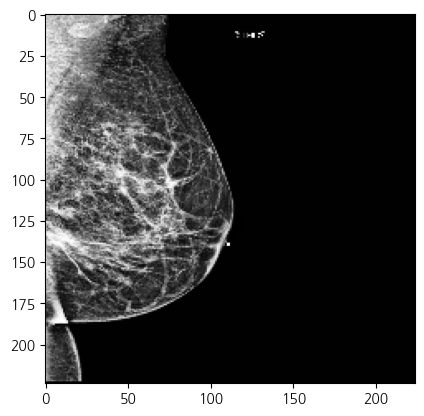

tensor(1.) tensor(-1.)


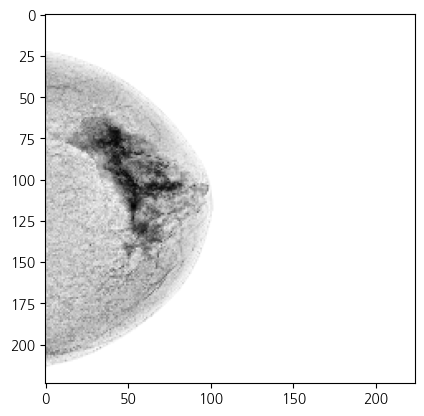

tensor(1.) tensor(-1.)


In [66]:
import matplotlib.pyplot as plt

for i in range(10):
    plt.imshow(v_image[i][0], 'gray')
    plt.show()

    print(v_image[i][0].max(), v_image[i][0].min())